# Ciência dos Dados - Projeto 2 

### Integrantes:
    Diogo Duarte
    Jorás Oliveira
    Pedro Mahfuz
    Rodrigo Furukawa

### Bibliotecas

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import math

#### Fazendo a leitura de nosso dataset

In [3]:
import chardet
with open('healthcare-dataset-stroke-data.csv', 'rb') as rawdata: # Abre o dataset
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

In [4]:
dados = pd.read_csv('healthcare-dataset-stroke-data.csv',encoding='utf-8') # Faz a leitura do Dataset.
dados

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
del dados['id'] # Remove colunas desnecessárias, no caso 'id' contém um numero unico para cada pessoa, que faz o dado se tornar irrelevante para a pesquisa
dados = dados.dropna(subset = ['bmi']) # Removendo todas as linhas que contem 'NaN' em bmi

In [6]:
dados

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [25]:
derrame = dados.loc[dados["stroke"] == 1, :]

In [26]:
derrame.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [21]:
nDerrame = dados.loc[dados["stroke"] == 0, :]

In [27]:
nDerrame.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
249,Male,3.0,0,0,No,children,Rural,95.12,18.0,Unknown,0
250,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
251,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown,0
252,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
253,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0


In [7]:
dados.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


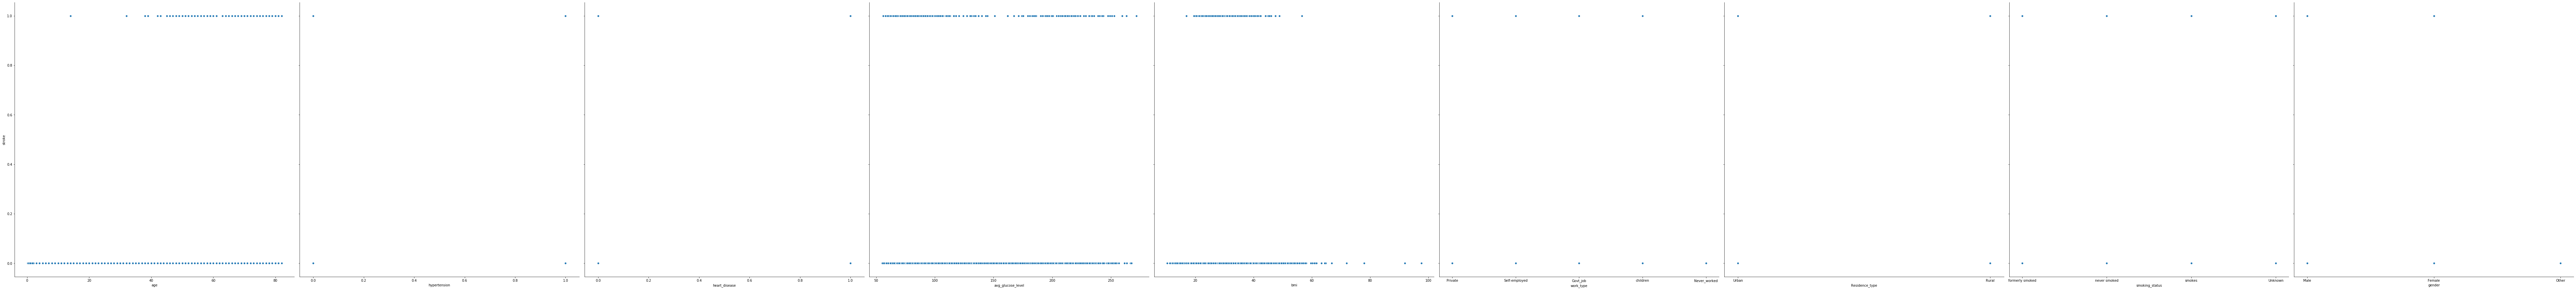

In [15]:
sns.pairplot(
    dados,
    x_vars = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'work_type', 'Residence_type', 'smoking_status', 'gender'],
    y_vars = ['stroke'],
    height = 12,
)

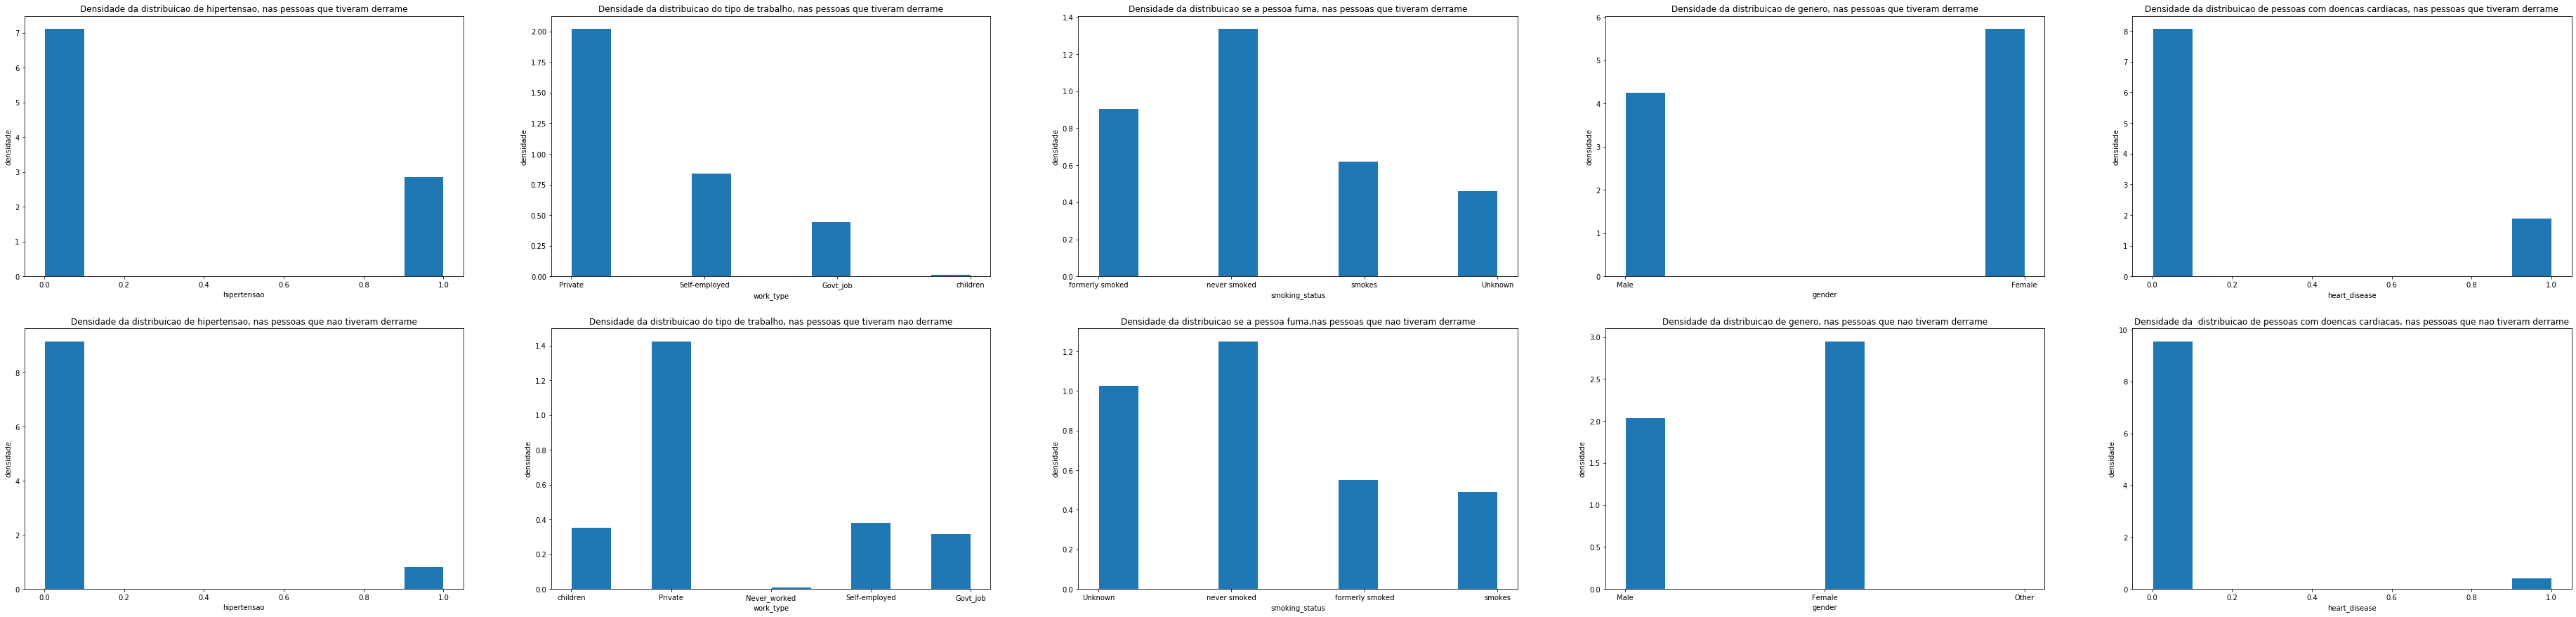

In [47]:
plt.figure(figsize=(65, 15))

plt.subplot(251)
plt.hist(derrame['hypertension'], edgecolor='white', density=True)
plt.title("Densidade da distribuicao de hipertensao, nas pessoas que tiveram derrame")
plt.ylabel('densidade')
plt.xlabel('hipertensao')

plt.subplot(256)
plt.hist(nDerrame['hypertension'], edgecolor='white', density=True)
plt.title("Densidade da distribuicao de hipertensao, nas pessoas que nao tiveram derrame")
plt.ylabel('densidade')
plt.xlabel('hipertensao')

plt.subplot(252)
plt.hist(derrame["work_type"], edgecolor='white', density=True)
plt.title("Densidade da distribuicao do tipo de trabalho, nas pessoas que tiveram derrame")
plt.ylabel('densidade')
plt.xlabel('work_type')

plt.subplot(257)
plt.hist(nDerrame["work_type"], edgecolor='white', density=True)
plt.title("Densidade da distribuicao do tipo de trabalho, nas pessoas que tiveram nao derrame")
plt.ylabel('densidade')
plt.xlabel('work_type')

plt.subplot(253)
plt.hist(derrame["smoking_status"], edgecolor='white', density=True)
plt.title("Densidade da distribuicao se a pessoa fuma, nas pessoas que tiveram derrame")
plt.ylabel('densidade')
plt.xlabel('smoking_status')

plt.subplot(258)
plt.hist(nDerrame["smoking_status"], edgecolor='white', density=True)
plt.title("Densidade da distribuicao se a pessoa fuma,nas pessoas que nao tiveram derrame")
plt.ylabel('densidade')
plt.xlabel('smoking_status')

plt.subplot(254)
plt.hist(derrame["gender"], edgecolor='white', density=True)
plt.title("Densidade da distribuicao de genero, nas pessoas que tiveram derrame")
plt.ylabel('densidade')
plt.xlabel('gender')

plt.subplot(259)
plt.hist(nDerrame["gender"], edgecolor='white', density=True)
plt.title("Densidade da distribuicao de genero, nas pessoas que nao tiveram derrame")
plt.ylabel('densidade')
plt.xlabel('gender')

plt.subplot(255)
plt.hist(derrame['heart_disease'], edgecolor='white', density=True)
plt.title("Densidade da distribuicao de pessoas com doencas cardiacas, nas pessoas que tiveram derrame")
plt.ylabel('densidade')
plt.xlabel('heart_disease')

plt.subplot(2, 5, 10)
plt.hist(nDerrame['heart_disease'], edgecolor='white', density=True)
plt.title("Densidade da  distribuicao de pessoas com doencas cardiacas, nas pessoas que nao tiveram derrame")
plt.ylabel('densidade')
plt.xlabel('heart_disease')


plt.show()